### 1. Linear regression with gradient decent

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### Loading dataset

In [2]:
housing_df = pd.read_csv('housing.csv')

In [3]:
housing_df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     546 non-null    int64 
 1   lotsize   546 non-null    int64 
 2   bedrooms  546 non-null    int64 
 3   bathrms   546 non-null    int64 
 4   stories   546 non-null    int64 
 5   driveway  546 non-null    object
 6   recroom   546 non-null    object
 7   fullbase  546 non-null    object
 8   gashw     546 non-null    object
 9   airco     546 non-null    object
 10  garagepl  546 non-null    int64 
 11  prefarea  546 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.3+ KB


In [5]:
housing_df.isnull().sum()

,0
price,0
lotsize,0
bedrooms,0
bathrms,0
stories,0
driveway,0
recroom,0
fullbase,0
gashw,0
airco,0


There are no null values in the dataset.

In [6]:
housing_df['prefarea'].value_counts()

,count
prefarea,
no,418
yes,128


In [7]:
housing_df['driveway'].value_counts()

,count
driveway,
yes,469
no,77


In [8]:
housing_df['recroom'].value_counts()

,count
recroom,
no,449
yes,97


In [9]:
housing_df['fullbase'].value_counts()

,count
fullbase,
no,355
yes,191


In [10]:
housing_df['gashw'].value_counts()

,count
gashw,
no,521
yes,25


In [11]:
housing_df['airco'].value_counts()

,count
airco,
no,373
yes,173


As observed from the above there are only two values in the categorical values column that is yes and no. So, using Label encoding to encode these columns i.e., to convert them to numerical values.  Replacing yes with 1 and no with 0.

In [12]:
categorical_columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

In [13]:
housing_df[categorical_columns] = housing_df[categorical_columns].replace({'yes': 1, 'no': 0})

<ipython-input-13-ab509b06858d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_df[categorical_columns] = housing_df[categorical_columns].replace({'yes': 1, 'no': 0})


In [14]:
housing_df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [15]:
housing_df.dtypes

,0
price,int64
lotsize,int64
bedrooms,int64
bathrms,int64
stories,int64
driveway,int64
recroom,int64
fullbase,int64
gashw,int64
airco,int64


All the categorical values are converted to numerical values.

Normalizing the features. As price is the target variable excluding the target and normalizing all the other features.

In [16]:
target = housing_df['price']

In [17]:
features = housing_df.drop(['price'], axis=1)

In [18]:
mean_features = features.mean()
std_features = features.std()

In [19]:
normalized_features = (features - mean_features) / std_features

In [20]:
housing_df_norm = pd.concat([target, normalized_features], axis=1)

In [21]:
housing_df_norm.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,0.322732,0.047192,-0.568973,0.221501,0.404819,-0.464371,1.362070,-0.218853,-0.68041,0.357239,-0.552865
1,38500,-0.530526,-1.308947,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865
2,49500,-0.964074,0.047192,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865
3,60500,0.691709,0.047192,-0.568973,0.221501,0.404819,2.149509,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865
4,61000,0.557955,-1.308947,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865


All the feature values are normalized.

In [22]:
target = housing_df_norm['price'].values.reshape(-1, 1)
features = housing_df_norm.drop(['price'], axis=1).values

Initializing the weights and hyperparameters

In [23]:
n_samples, n_features = features.shape
weights = np.zeros((n_features, 1))
bias = 0

In [24]:
learning_rate = 0.25
n_epochs = 10
for i in range(n_epochs):
    predictions = np.dot(features, weights) + bias
    dweight = (1 / n_samples) * np.dot(features.T, (predictions - target))
    dbias = (1 / n_samples) * np.sum(predictions - target)
    weights = weights - learning_rate * dweight
    bias = bias - learning_rate * dbias
    rmse = np.sqrt(np.mean((predictions - target) ** 2))
    print(f"Epoch {i + 1}, RMSE: {rmse:.4f}")

Epoch 1, RMSE: 73159.2694
Epoch 2, RMSE: 54200.1535
Epoch 3, RMSE: 41542.2305
Epoch 4, RMSE: 32692.6465
Epoch 5, RMSE: 26518.4359
Epoch 6, RMSE: 22316.8729
Epoch 7, RMSE: 19558.6026
Epoch 8, RMSE: 17816.5784
Epoch 9, RMSE: 16753.8855
Epoch 10, RMSE: 16122.6792


plot ‘price’ vs ‘lotsize’

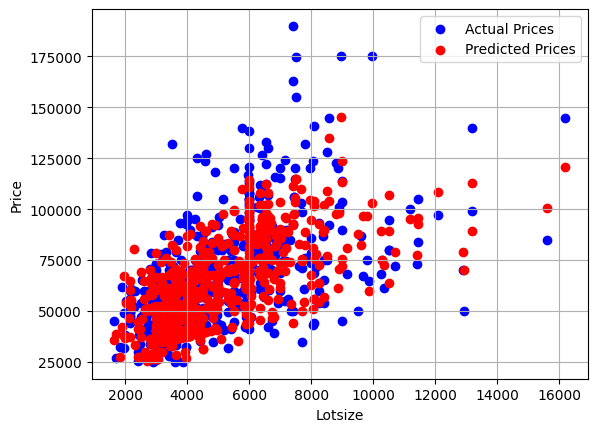

In [25]:
lotsize = housing_df['lotsize'].values.reshape(-1, 1)
plt.scatter(lotsize, target, color='blue', label='Actual Prices')
plt.scatter(lotsize, np.dot(features, weights) + bias, color='red', label='Predicted Prices')
plt.xlabel("Lotsize")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


Calculating and plotting R2

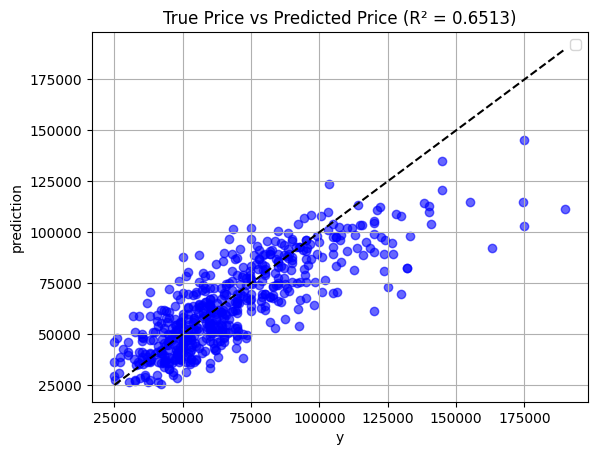

In [26]:
def rsquare_function(ground, predicted):
    sst = np.sum((ground - np.mean(ground)) ** 2)
    ssr = np.sum((ground - predicted) ** 2)
    r_square = 1 - (ssr / sst)
    return r_square
predicted_price = np.dot(features, weights) + bias
r_square = rsquare_function(target, predicted_price)
plt.scatter(target, predicted_price, color='blue', alpha=0.6)
plt.plot([target.min(), target.max()], [target.min(), target.max()], color='black', linestyle='--')
plt.title(f"True Price vs Predicted Price (R² = {r_square:.4f})")
plt.xlabel("y")
plt.ylabel("prediction")
plt.legend()
plt.grid()
plt.show()

### 1.2 Build a gradient descent algorithm 

In [27]:
for i in range(n_epochs):
    predictions = np.dot(features, weights) + bias
    dweight = (2 / n_samples) * np.dot(features.T, (predictions - target))
    dbias = (2 / n_samples) * np.sum(predictions - target)
    weights = weights - learning_rate * dweight
    bias = bias - learning_rate * dbias
    rmse = np.sqrt(np.mean((predictions - target) ** 2))
    print(f"Epoch {i + 1}/{n_epochs}, RMSE: {rmse:.4f}")

Epoch 1/10, RMSE: 15754.4544
Epoch 2/10, RMSE: 15387.4344
Epoch 3/10, RMSE: 15290.9198
Epoch 4/10, RMSE: 15264.8386
Epoch 5/10, RMSE: 15257.2674
Epoch 6/10, RMSE: 15254.7741
Epoch 7/10, RMSE: 15253.7992
Epoch 8/10, RMSE: 15253.3463
Epoch 9/10, RMSE: 15253.1069
Epoch 10/10, RMSE: 15252.9702


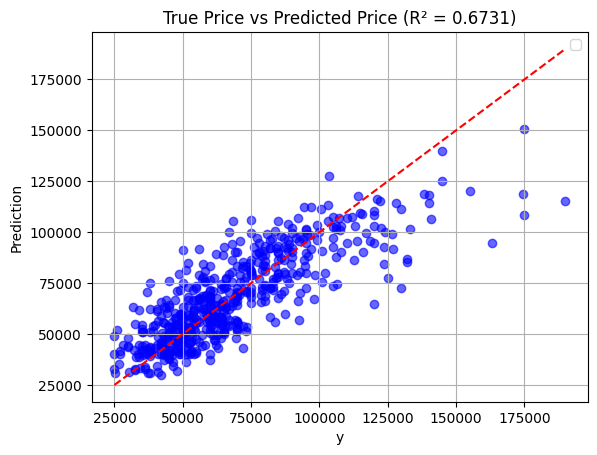

In [28]:
def rsquare_function(ground, predicted):
    sst = np.sum((ground - np.mean(ground)) ** 2)
    ssr = np.sum((ground - predicted) ** 2)
    r_square = 1 - (ssr / sst)
    return r_square
predicted_price = np.dot(features, weights) + bias
r_square = rsquare_function(target, predicted_price)
plt.scatter(target, predicted_price, color='blue', alpha=0.6)
plt.plot([target.min(), target.max()], [target.min(), target.max()], color='red', linestyle='--')
plt.title(f"True Price vs Predicted Price (R² = {r_square:.4f})")
plt.xlabel("y")
plt.ylabel("Prediction")
plt.legend()
plt.grid()
plt.show()
